In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2

In [4]:
def readProcesing(imgColor, imageSize):
  image = cv2.imread('dataset\F_Banana/1.jpg')
  if image is None:
    print("Error: Image not found or cannot be read.")
    return None

  if imgColor == 'RGB':
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
  elif(imgColor == "Gray"):
    image = cv2.cvtColor(image,cv2.COLOR_GRAY2BGR)

  imResize = cv2.resize(image,dsize=(imageSize, imageSize))
  return imResize.astype("float32")/255

In [5]:
readProcesing('RGB',224)

array([[[0.9372549 , 0.9254902 , 0.8509804 ],
        [0.9411765 , 0.92941177, 0.85490197],
        [0.94509804, 0.93333334, 0.85882354],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       [[0.9372549 , 0.9254902 , 0.8509804 ],
        [0.9411765 , 0.92941177, 0.85490197],
        [0.94509804, 0.93333334, 0.85882354],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       [[0.9372549 , 0.9254902 , 0.8509804 ],
        [0.9372549 , 0.9254902 , 0.8509804 ],
        [0.94509804, 0.93333334, 0.85882354],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       ...,

       [[0.827451  , 0.8039216 , 0.7019608 ],
        [0.80784315, 0.7882353 , 0.7019608 ],
        [0.8       , 0

***Normalizacion  de los datos***

In [6]:
def cargar_imagenes(carpeta):
    # Obtener lista de imágenes en la carpeta especificada
    lista_imagenes = os.listdir(carpeta)
    imagenes = []
    # Cargar las imágenes en una lista
    for nombre_imagen in lista_imagenes:
        imagen_path = os.path.join(carpeta, nombre_imagen)
        imagen = cv2.imread(imagen_path)
        imagenes.append(imagen)
    return imagenes

In [7]:
def normalizar_imagenes(imagenes ):
    # Normalizar las imágenes
    imagenes_normalizadas = []
    for imagen in imagenes:
          if imagen is None:
            print("Error: Image not found or cannot be read.")            
          image = cv2.cvtColor(imagen,cv2.COLOR_RGB2BGR)
          imResize = cv2.resize(image,dsize=(244, 244))
        # Aquí puedes agregar cualquier otra lógica de normalización que desees
          imagenes_normalizadas.append(imResize)

    return imagenes_normalizadas

In [8]:
def mostrar_imagenes(imagenes, titulos):
    num_imagenes = len(imagenes)
    fig = plt.figure(figsize=(15, 10))

    for i in range(num_imagenes):
        # Mostrar la imagen en el subplot correspondiente
        ax = fig.add_subplot(1, num_imagenes, i + 1)
        ax.imshow(imagenes[i])
        ax.set_title(titulos[i])  # El título de la imagen es el nombre de la carpeta
        ax.axis('off')  # Ocultar ejes

    plt.show()

In [9]:
nombreFrutas = ["F_Banana", "F_Lemon", "F_Lulo","F_Mango", "F_Orange", "F_Strawberry", "F_Tamarillo", "F_Tomato","S_Banana", "S_Lemon", "S_Lulo","S_Mango", "S_Orange", "S_Strawberry", "S_Tamarillo", "S_Tomato"]

***Visualizacion de los datos preprocesados***

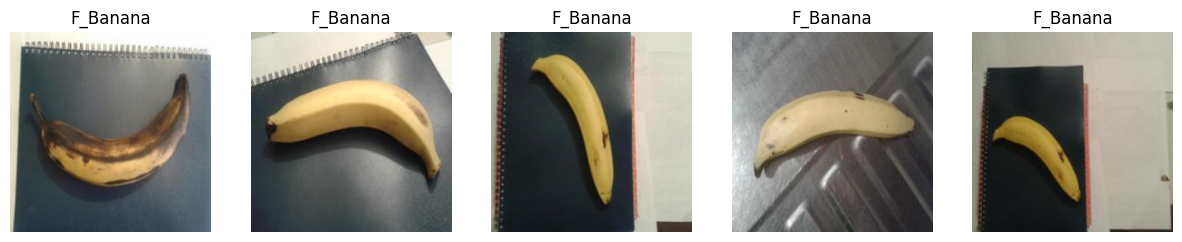

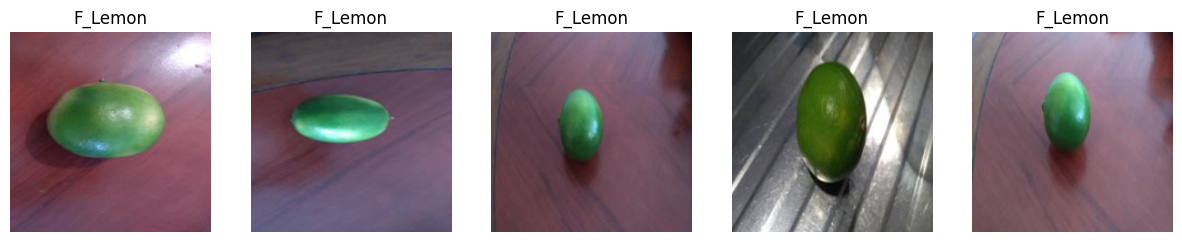

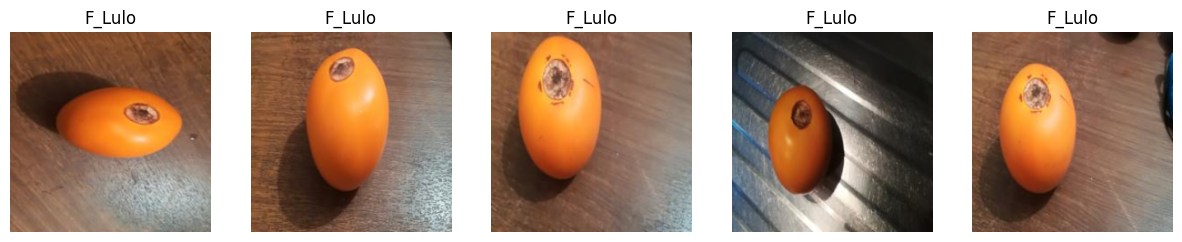

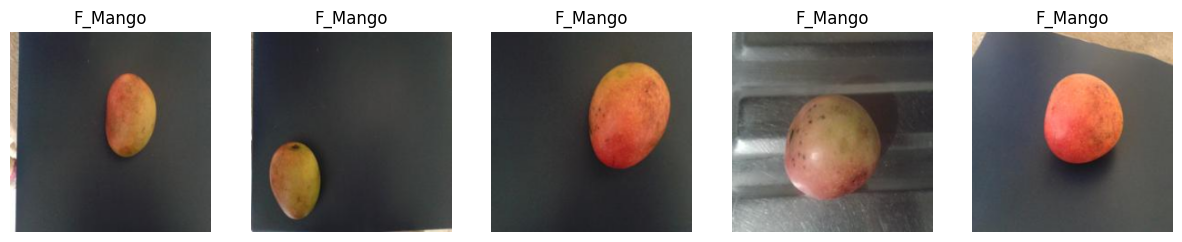

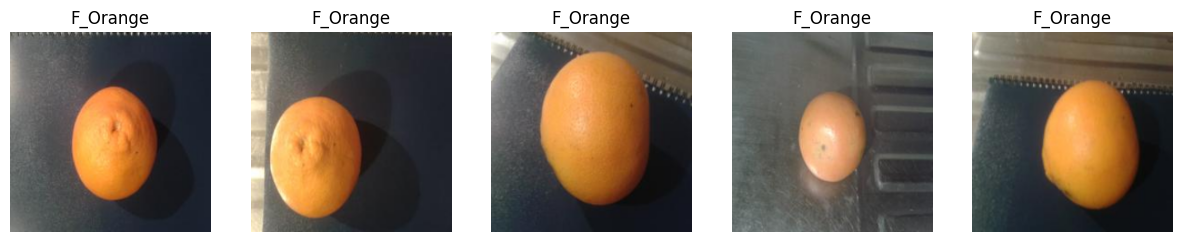

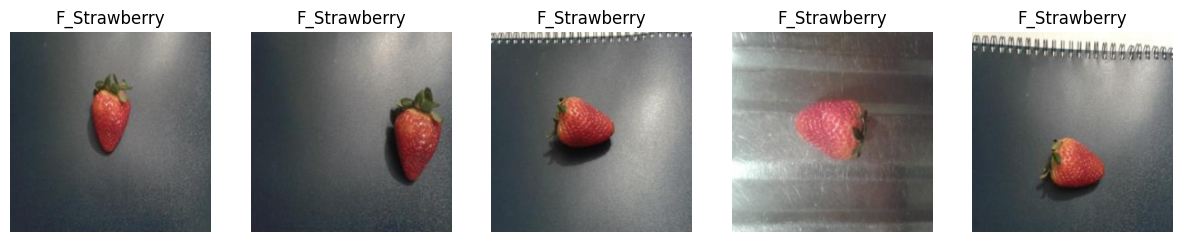

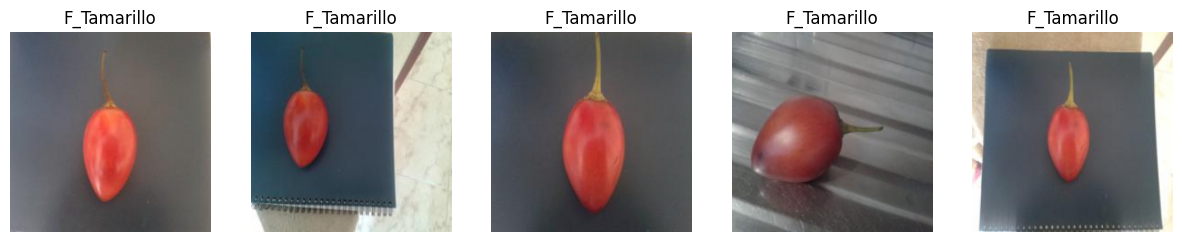

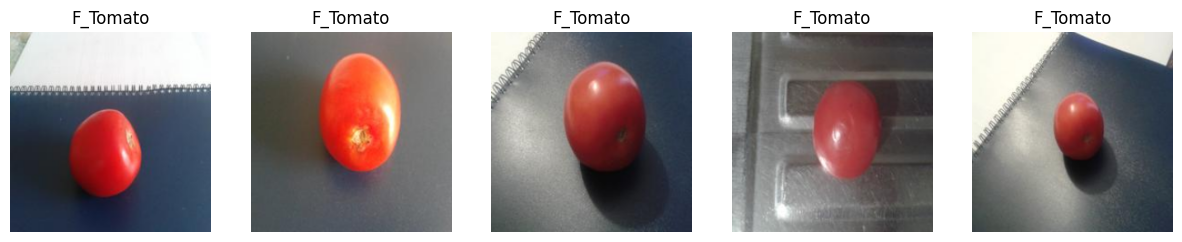

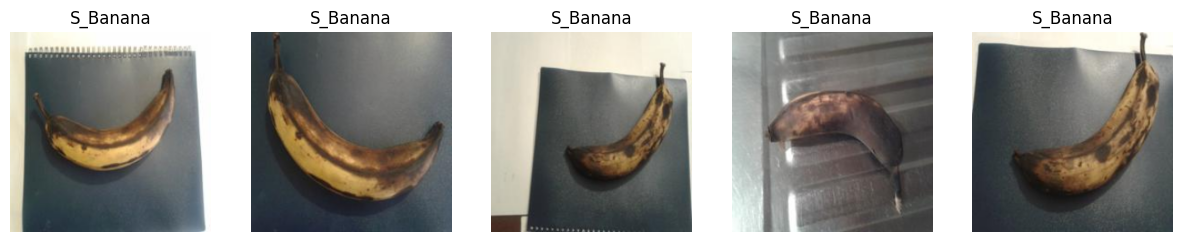

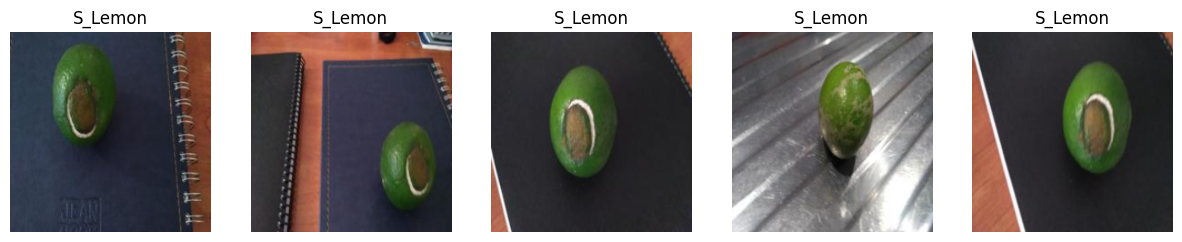

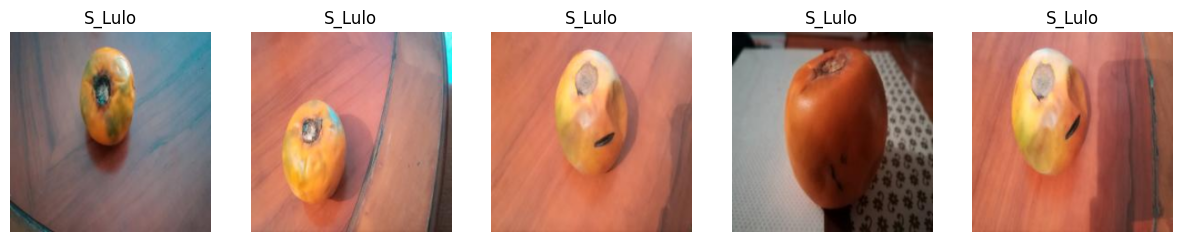

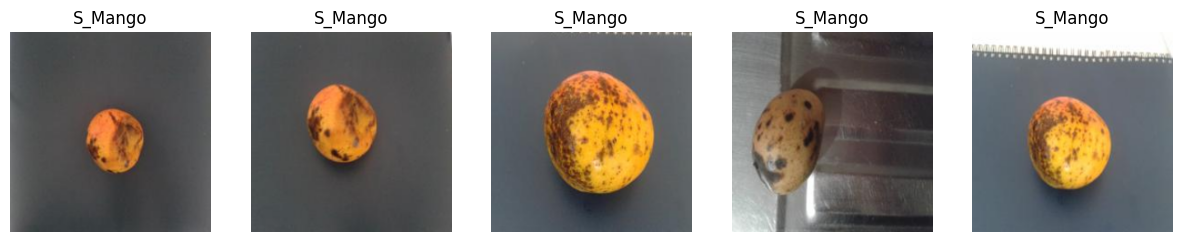

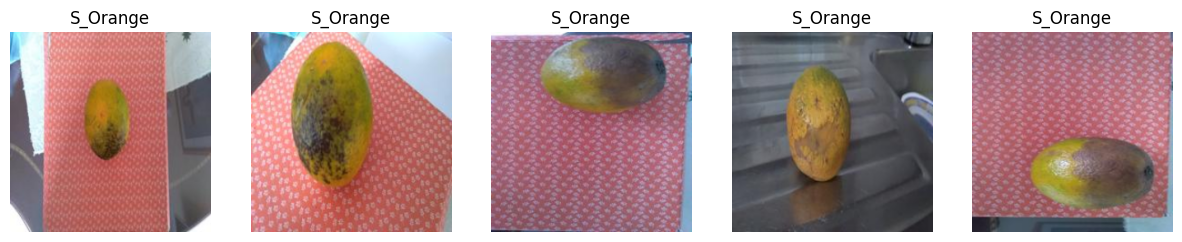

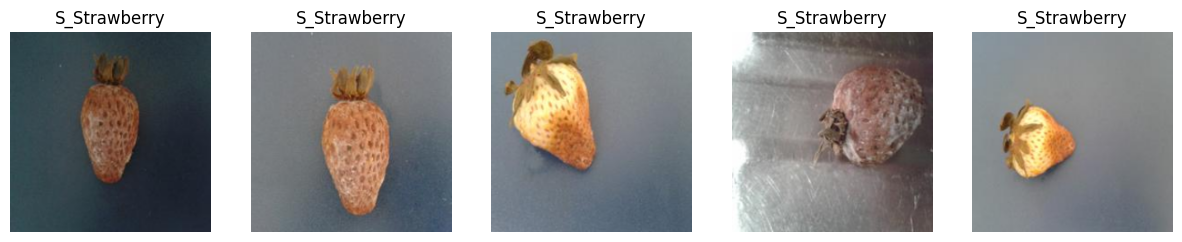

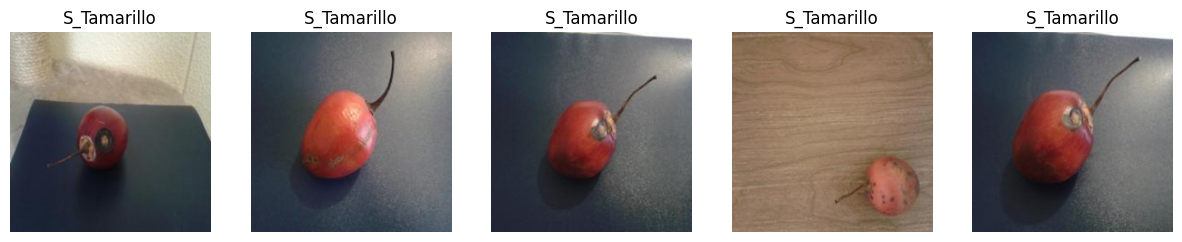

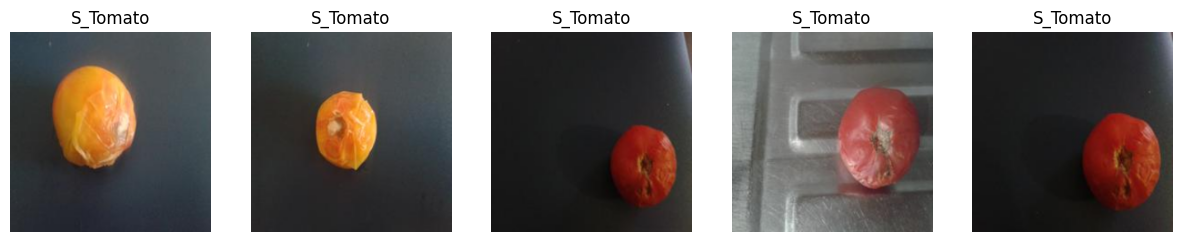

In [10]:
imagenesFruta = {}
for  nombreFruta  in nombreFrutas:
        ruta = os.path.join("dataset", nombreFruta)
        imagenFrutaFresca = cargar_imagenes(ruta)
        imagenFrutaFresca = normalizar_imagenes(imagenFrutaFresca)
        imagenesFruta[nombreFruta] = imagenFrutaFresca
        mostrar_imagenes(imagenesFruta[nombreFruta][:5], [nombreFruta]*5)

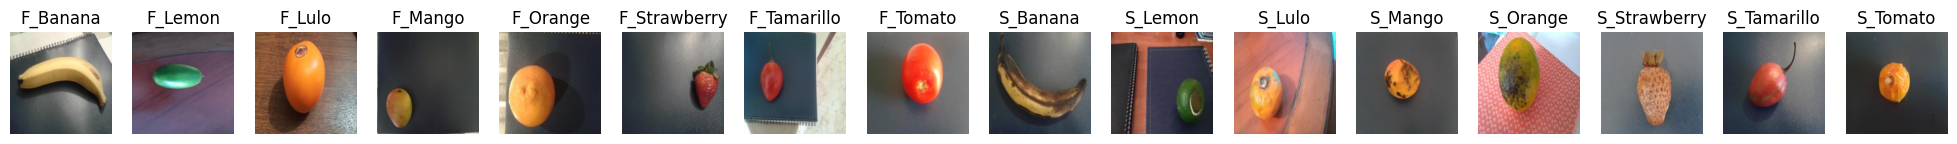

In [11]:
import matplotlib.pyplot as plt
import os

# Aumentar el tamaño de la figura
fig, axs = plt.subplots(1, len(imagenesFruta), figsize=(25, 5))

# Iterar sobre las frutas y sus imágenes
for i, (nombre_fruta, imagenes) in enumerate(imagenesFruta.items()):
    if imagenes:  # Verificar si hay al menos una imagen para la fruta
        # Mostrar la primera imagen de la fruta actual
        axs[i].imshow(imagenes[1])
        axs[i].set_title(nombre_fruta)
        axs[i].axis('off')

plt.show()

# Guardar datos

In [12]:
import h5py

In [13]:
with h5py.File('imagenes_frutas.h5', 'w') as hf:
    # Iterar sobre las frutas y sus imágenes
    for nombre_fruta, imagenes in imagenesFruta.items():
        # Crear un grupo para cada fruta
        grupo_fruta = hf.create_group(nombre_fruta)
        # Iterar sobre las imágenes de la fruta y guardarlas como conjuntos de datos
        for i, imagen in enumerate(imagenes):
            grupo_fruta.create_dataset(f'imagen_{i}', data=imagen)

# Leer los datos

***Visualizar***

In [1]:
import h5py

# Ruta del archivo H5
archivo_h5 = 'imagenes_frutas.h5'

# Crear un diccionario para almacenar las imágenes
imagenes_frutas = {}

# Leer las imágenes desde el archivo H5
with h5py.File(archivo_h5, 'r') as hf:
    for nombre_fruta in hf.keys():
        grupo_fruta = hf[nombre_fruta]
        imagenes_fruta = []
        for nombre_imagen in grupo_fruta.keys():
            # Leer la imagen como un array numpy
            imagen = grupo_fruta[nombre_imagen][()]
            # Normalizar los valores de píxeles al rango de 0 a 1
            imagen = imagen / 255.0
            imagenes_fruta.append(imagen)
        imagenes_frutas[nombre_fruta] = imagenes_fruta


In [18]:
imagenes_frutas["F_Banana"][0]

array([[[0.9372549 , 0.9254902 , 0.85098039],
        [0.94117647, 0.92941176, 0.85490196],
        [0.94509804, 0.93333333, 0.85882353],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       [[0.9372549 , 0.9254902 , 0.85098039],
        [0.94117647, 0.92941176, 0.85490196],
        [0.94509804, 0.93333333, 0.85882353],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       [[0.9372549 , 0.9254902 , 0.85098039],
        [0.9372549 , 0.9254902 , 0.85098039],
        [0.94117647, 0.93333333, 0.85882353],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       ...,

       [[0.82352941, 0.8       , 0.70196078],
        [0.80784314, 0.78823529, 0.70196078],
        [0.8       , 0

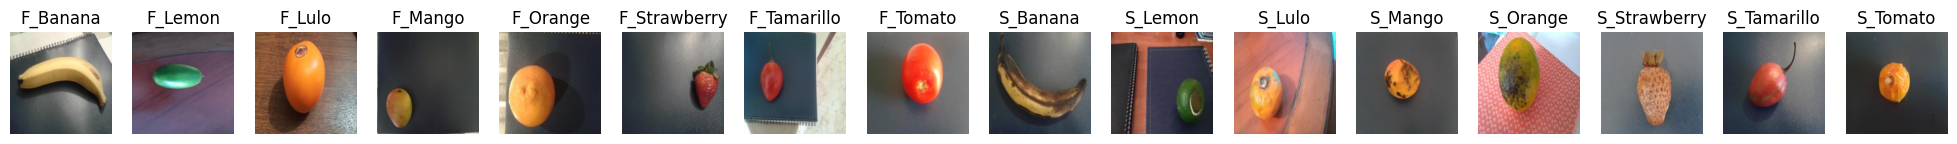

In [19]:
# Aumentar el tamaño de la figura
fig, axs = plt.subplots(1, len(imagenes_frutas), figsize=(25, 5))

# Iterar sobre las frutas y sus imágenes
for i, (nombre_fruta, imagenes) in enumerate(imagenes_frutas.items()):
    if imagenes:  # Verificar si hay al menos una imagen para la fruta
        # Mostrar la primera imagen de la fruta actual
        axs[i].imshow(imagenes[1])
        axs[i].set_title(nombre_fruta)
        axs[i].axis('off')

***Histogramas de Colores:***

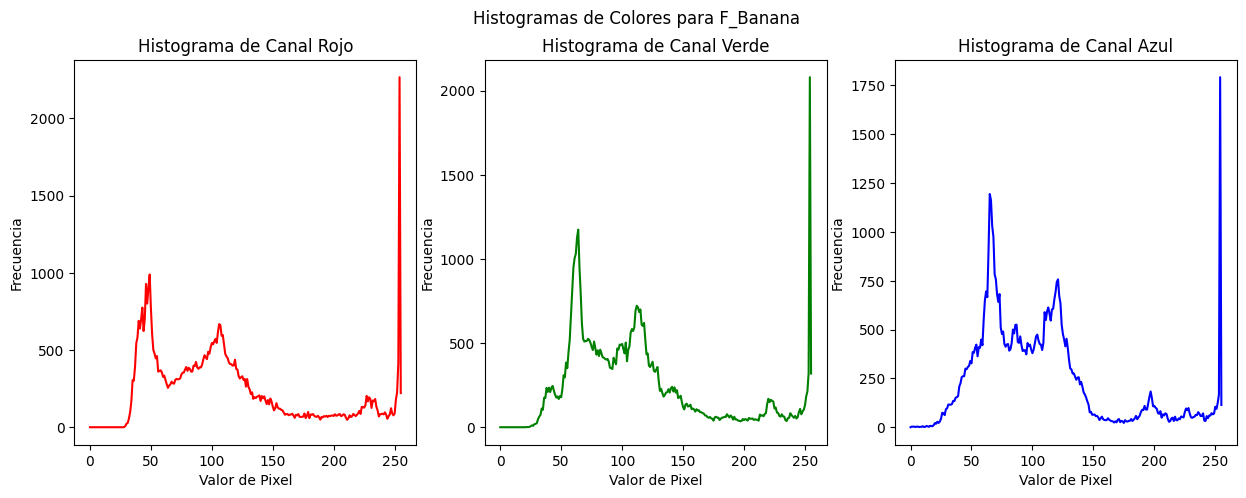

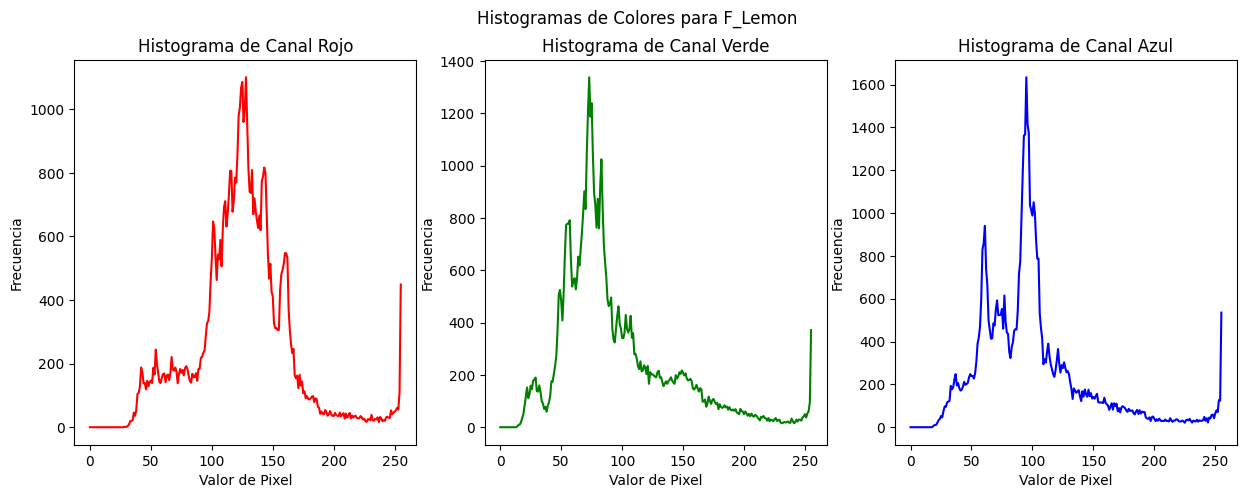

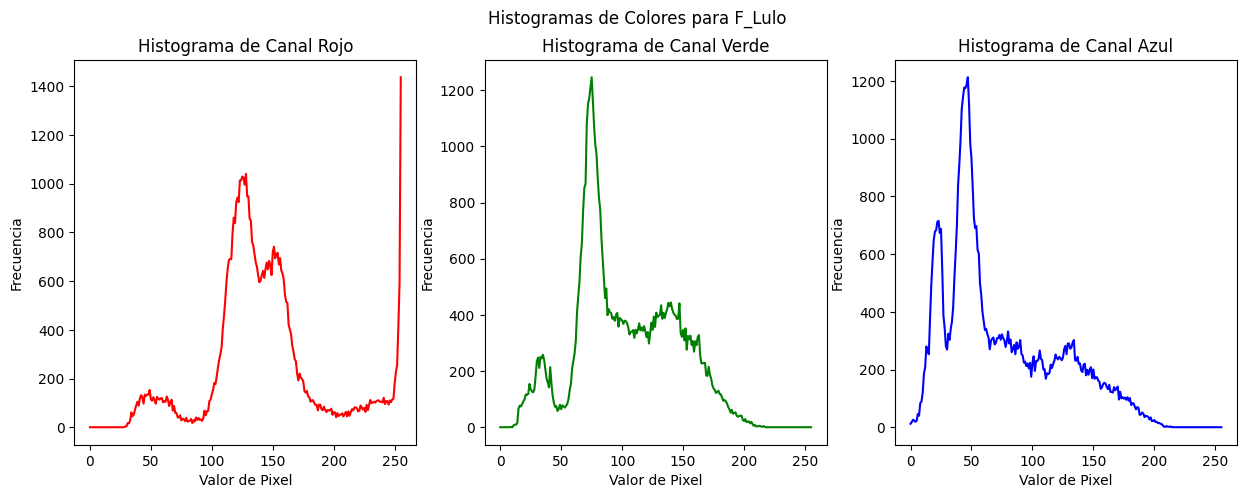

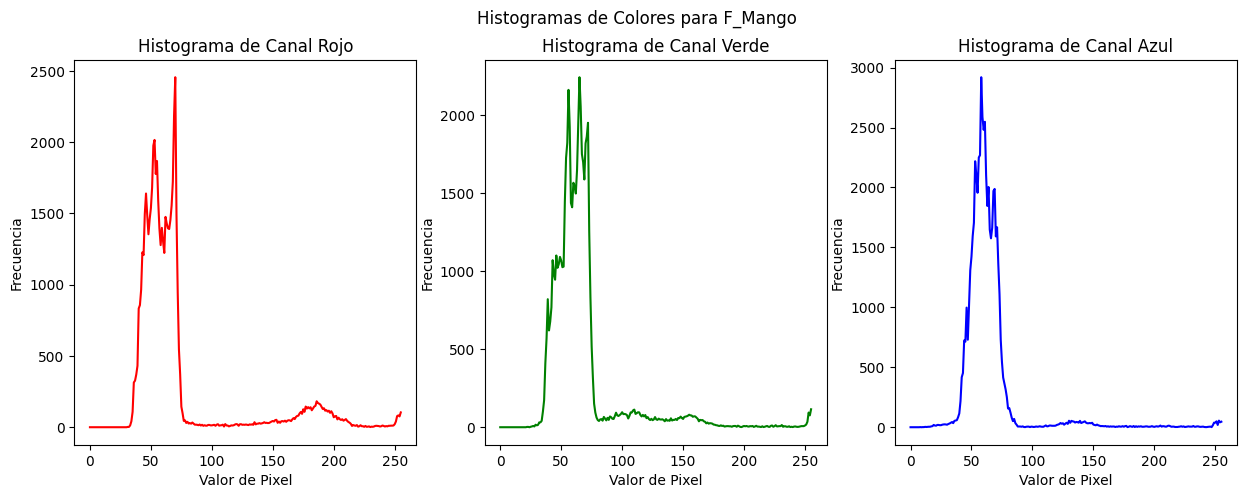

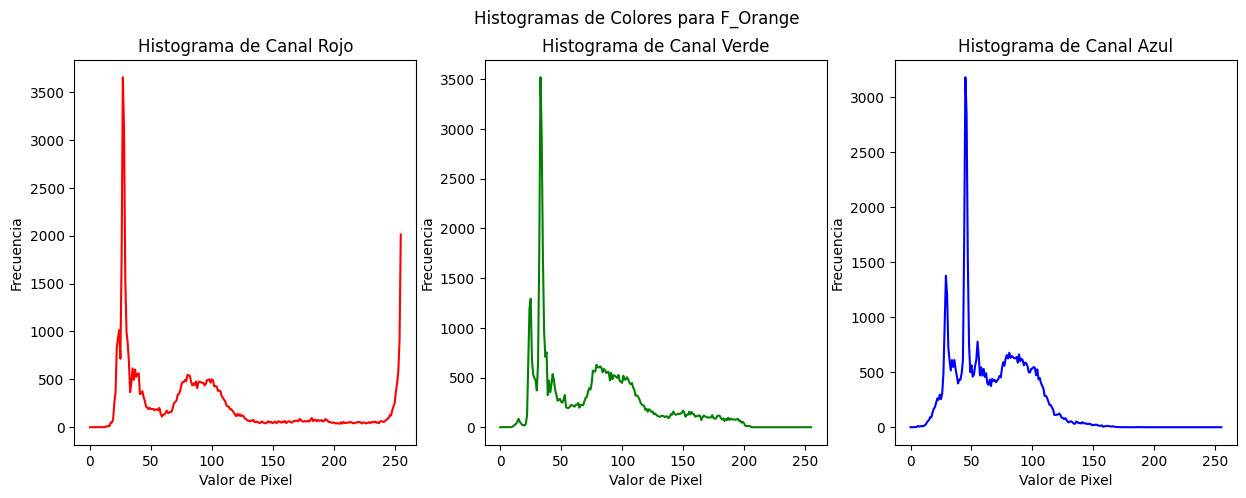

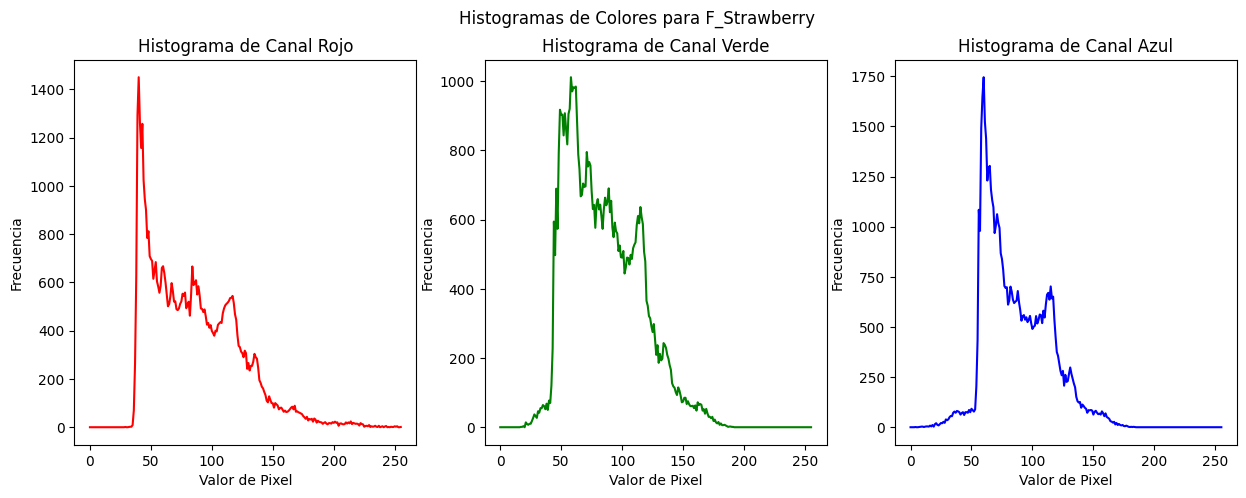

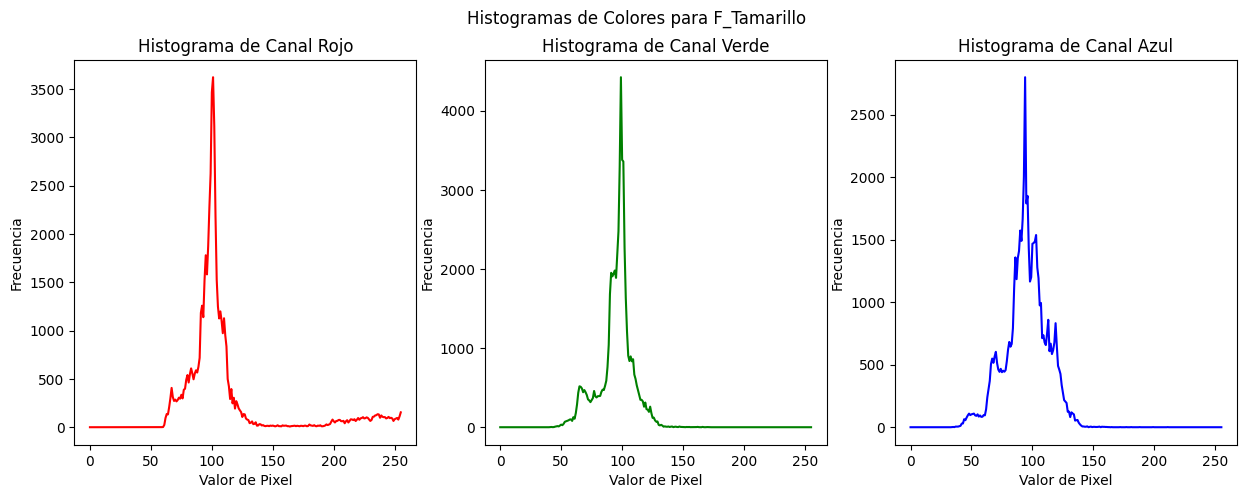

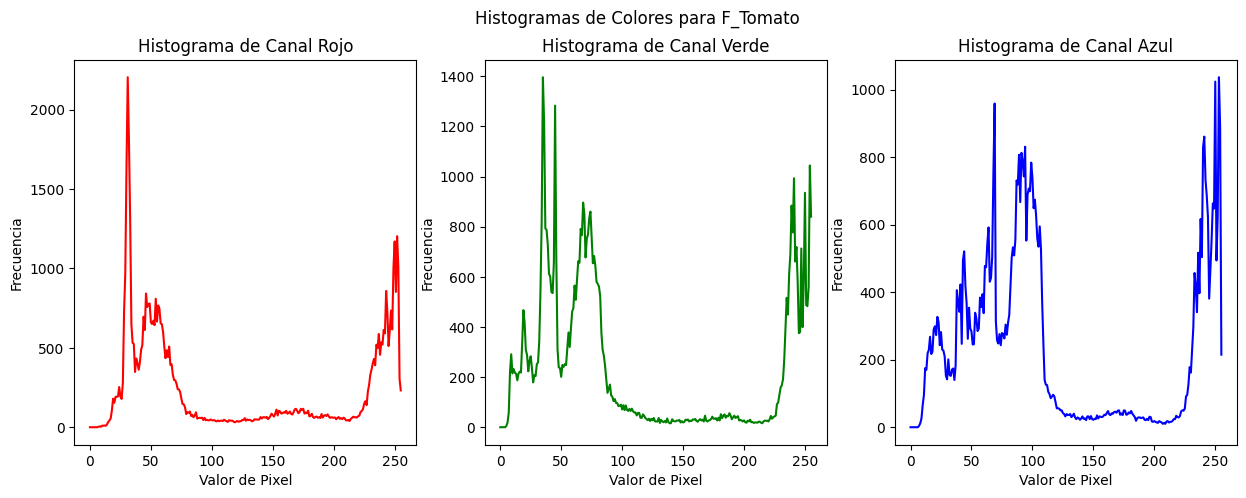

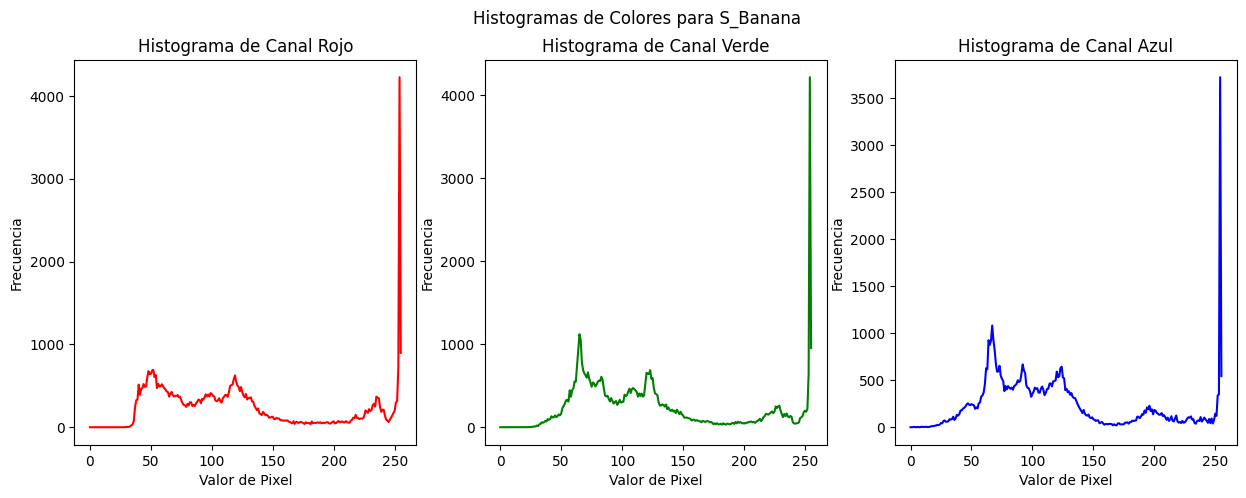

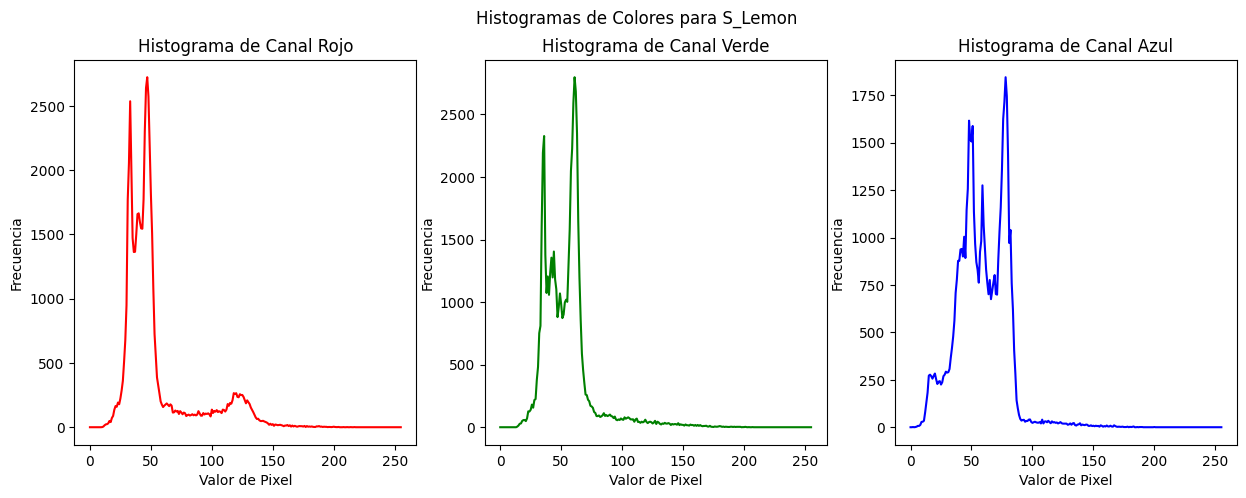

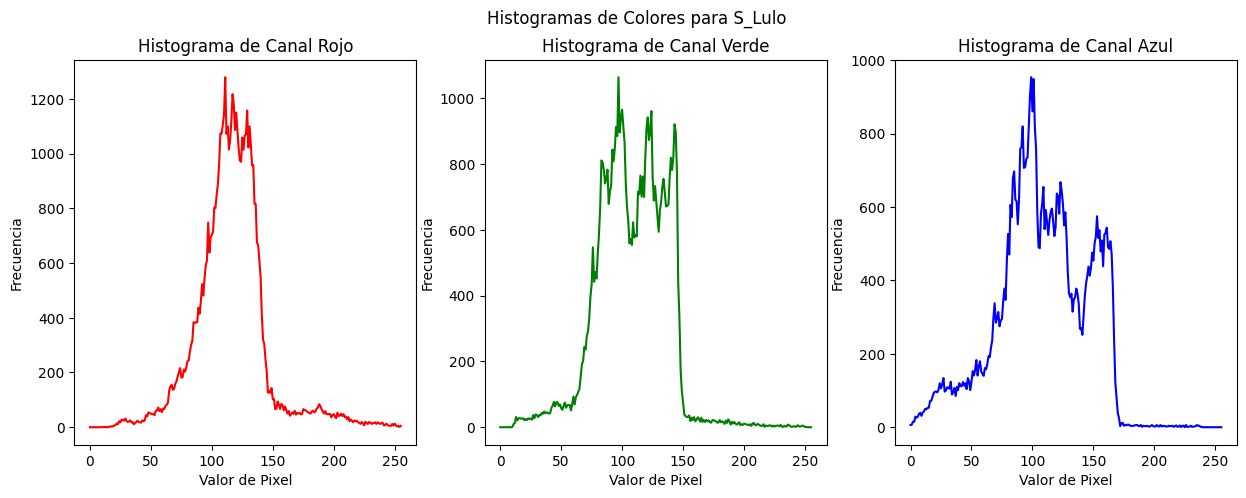

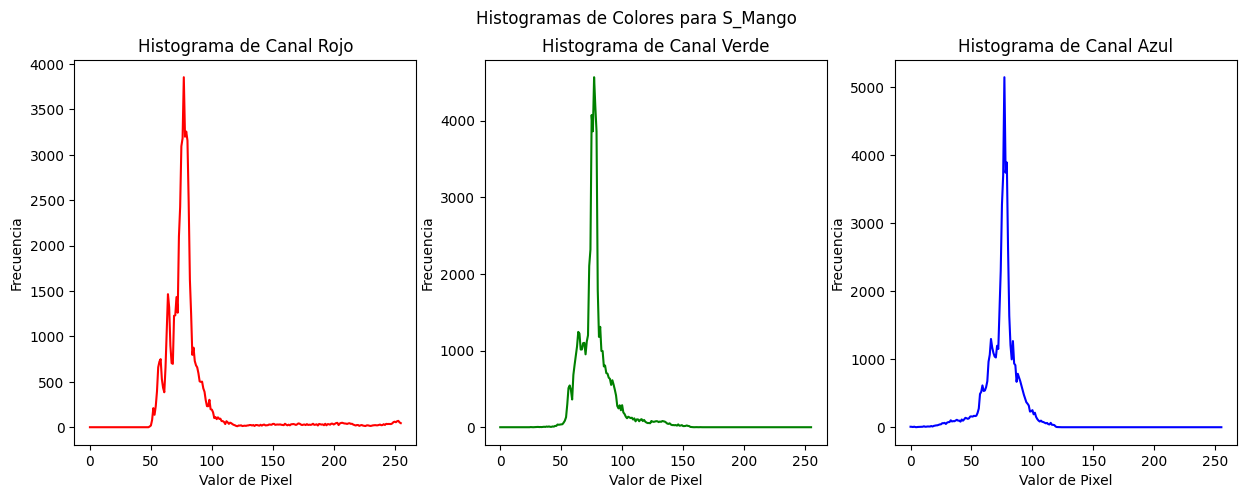

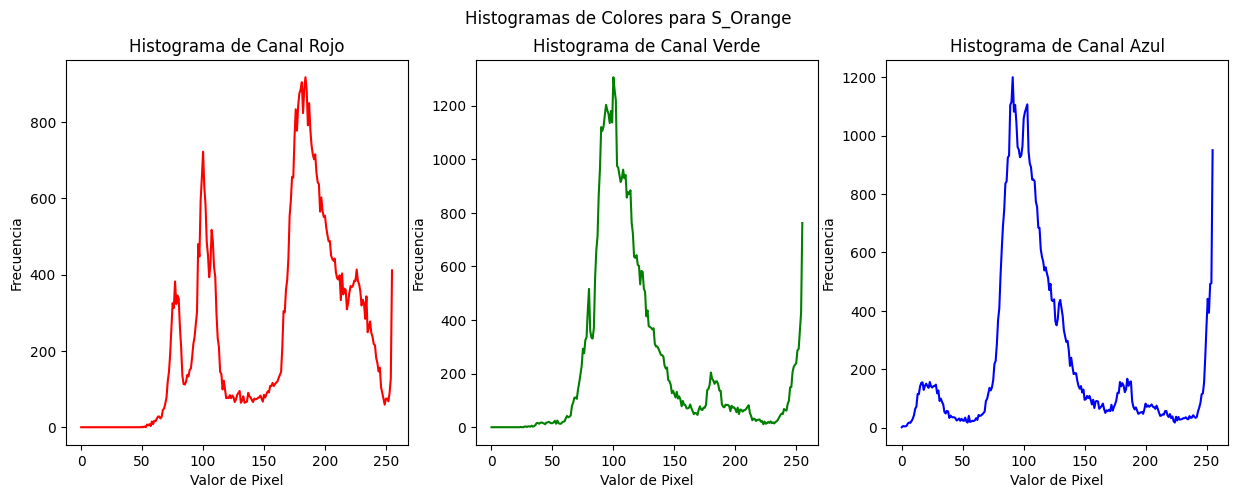

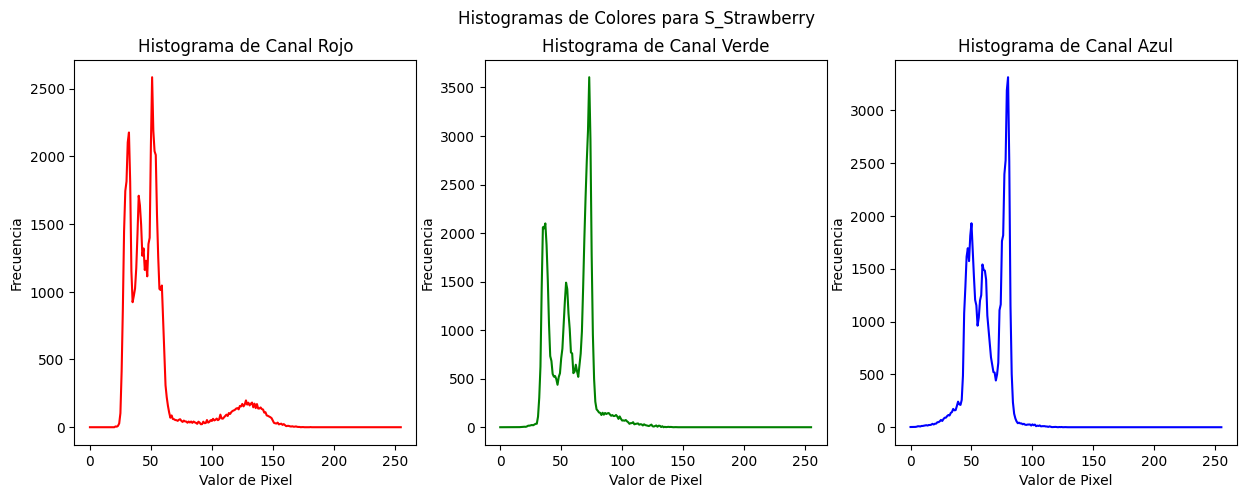

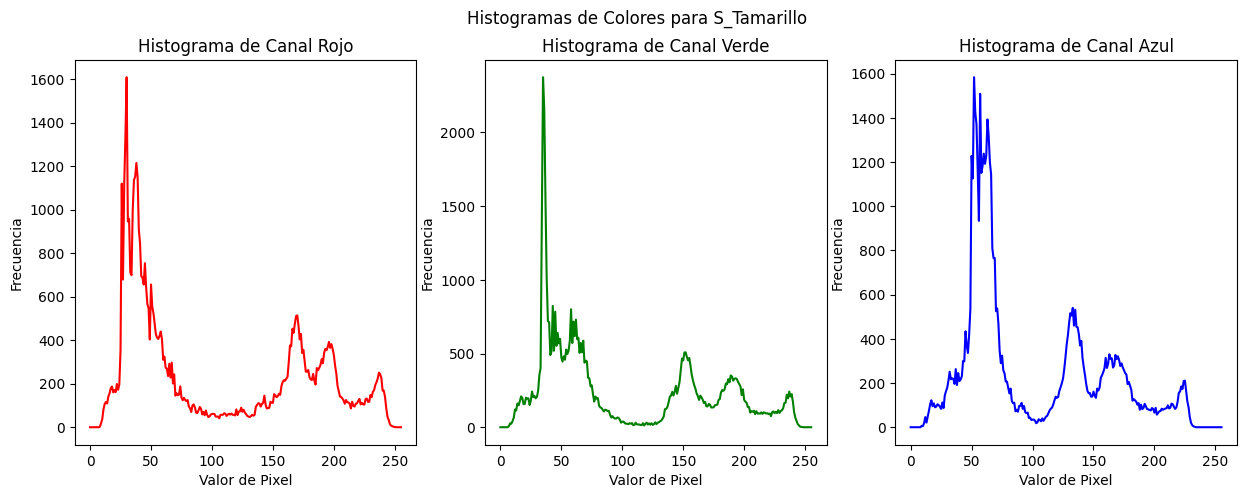

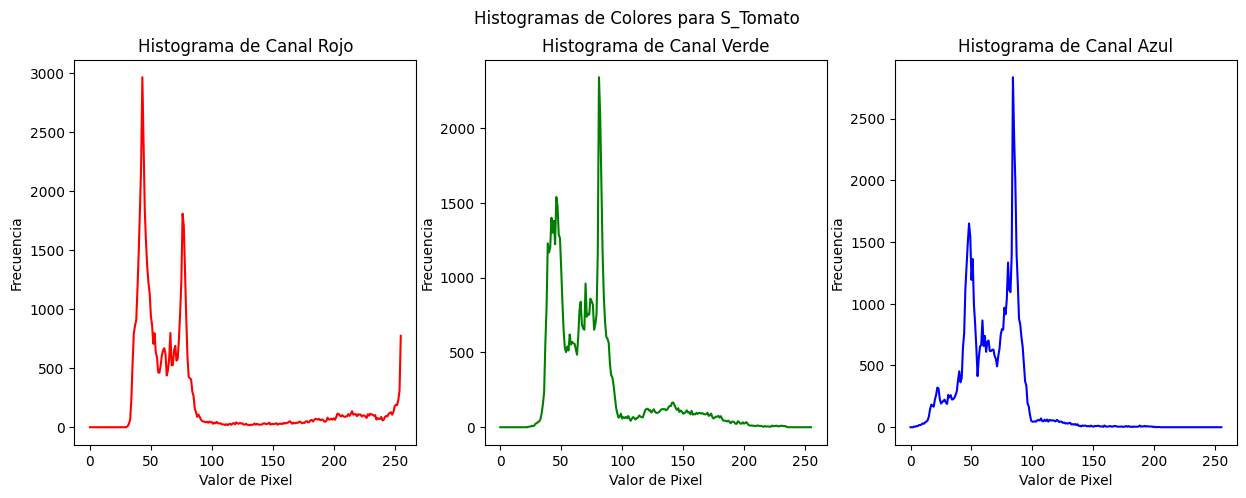

In [24]:
import numpy as np
import matplotlib.pyplot as plt

for nombre_fruta, imagenes in imagenes_frutas.items():
    if imagenes:
        # Convertir la imagen a escala de grises
        red_channel = imagenes[0][:, :, 0].flatten()
        green_channel = imagenes[0][:, :, 1].flatten()
        blue_channel = imagenes[0][:, :, 2].flatten()

        # Calcular los histogramas de cada canal de color
        hist_red, bins_red = np.histogram(red_channel, bins=256, range=[0, 256])
        hist_green, bins_green = np.histogram(green_channel, bins=256, range=[0, 256])
        hist_blue, bins_blue = np.histogram(blue_channel, bins=256, range=[0, 256])

        # Mostrar los histogramas
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        plt.plot(hist_red, color='red')
        plt.title('Histograma de Canal Rojo')
        plt.xlabel('Valor de Pixel')
        plt.ylabel('Frecuencia')

        plt.subplot(1, 3, 2)
        plt.plot(hist_green, color='green')
        plt.title('Histograma de Canal Verde')
        plt.xlabel('Valor de Pixel')
        plt.ylabel('Frecuencia')

        plt.subplot(1, 3, 3)
        plt.plot(hist_blue, color='blue')
        plt.title('Histograma de Canal Azul')
        plt.xlabel('Valor de Pixel')
        plt.ylabel('Frecuencia')

        plt.suptitle(f'Histogramas de Colores para {nombre_fruta}')
        plt.show()



***Gráficos de Dispersión de Color***

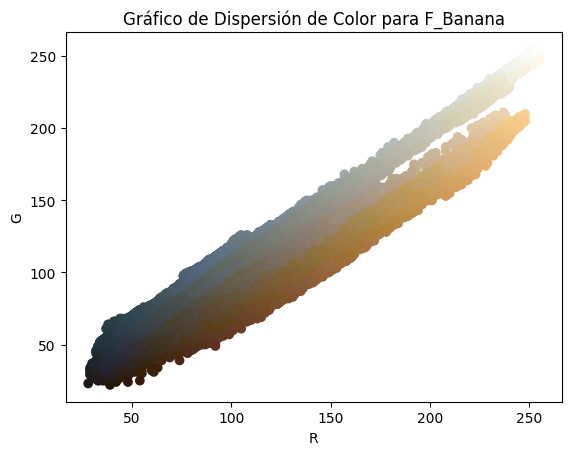

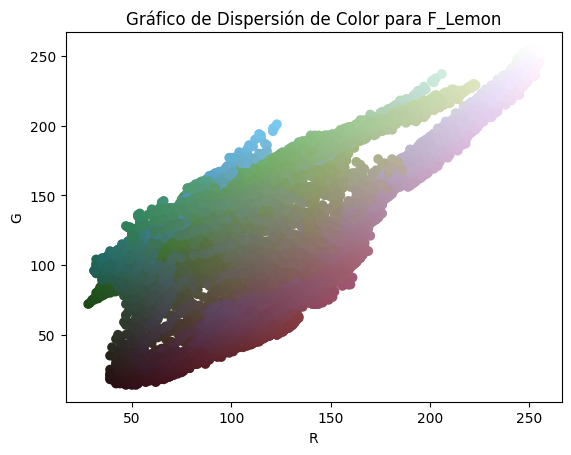

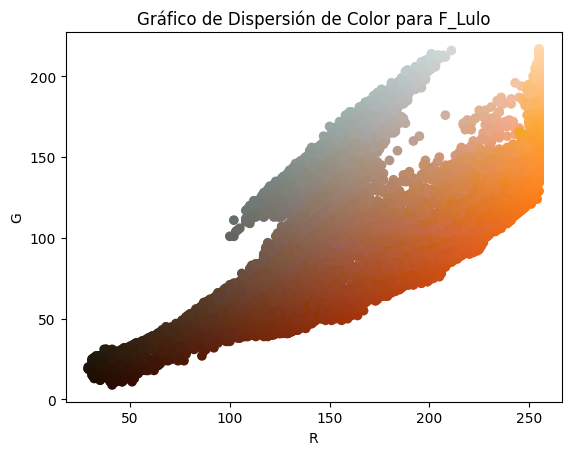

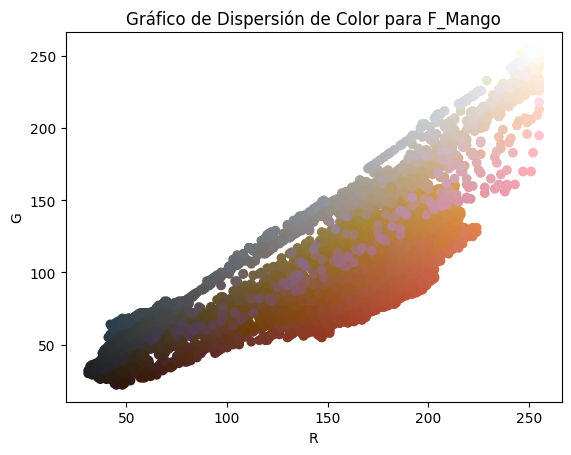

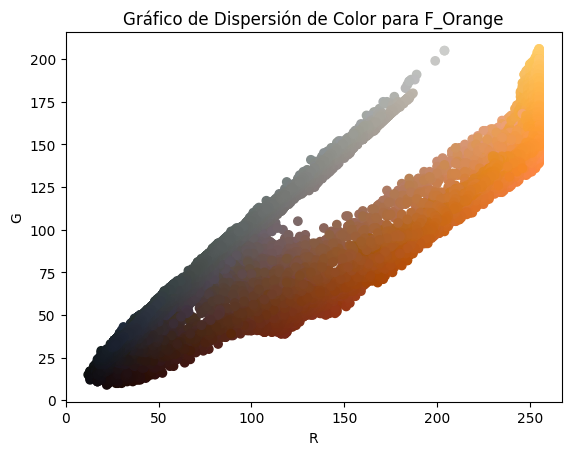

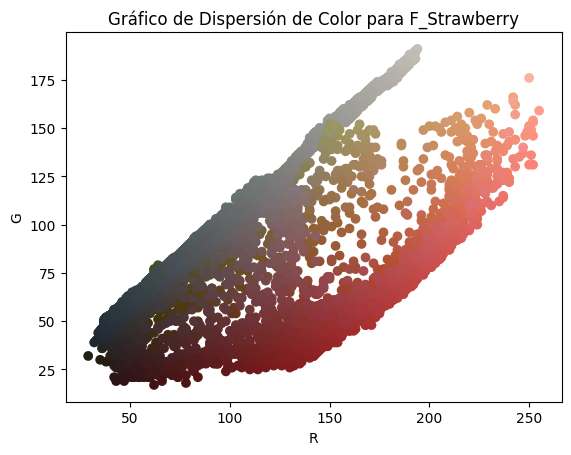

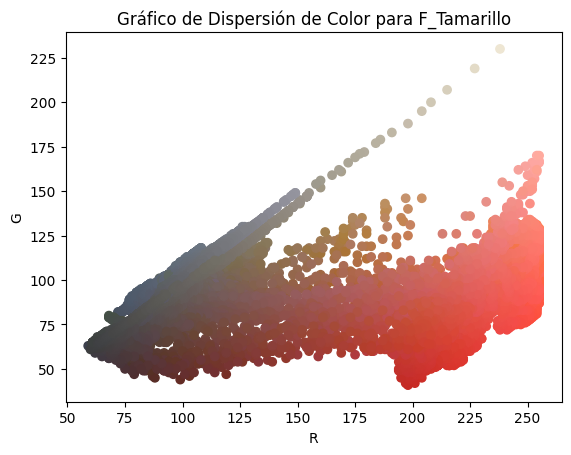

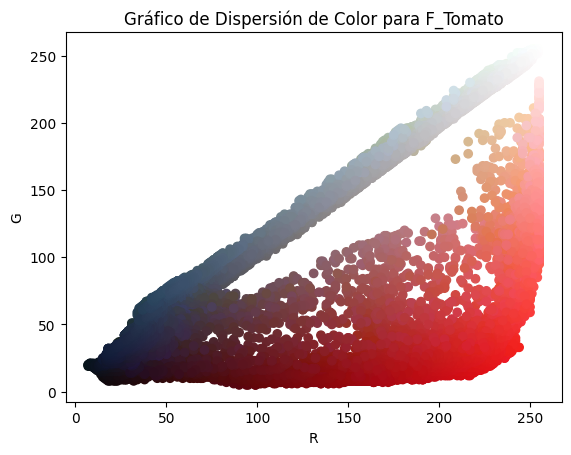

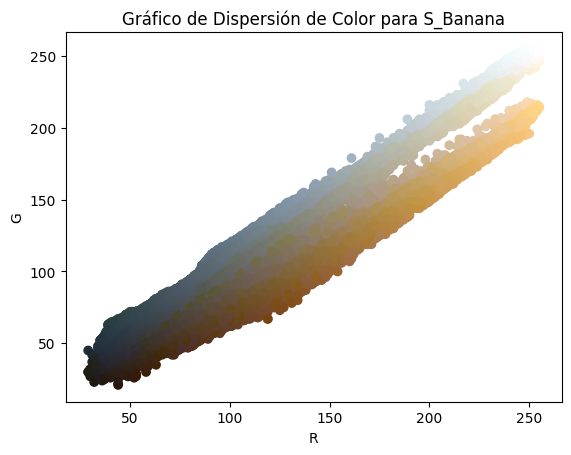

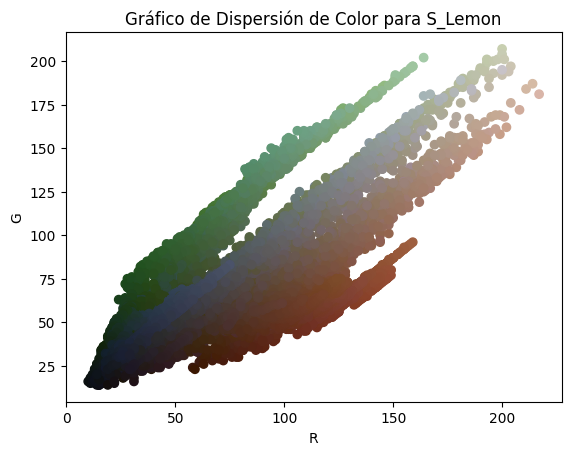

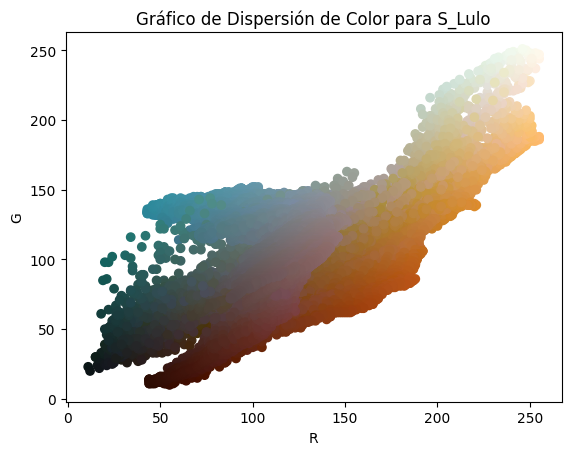

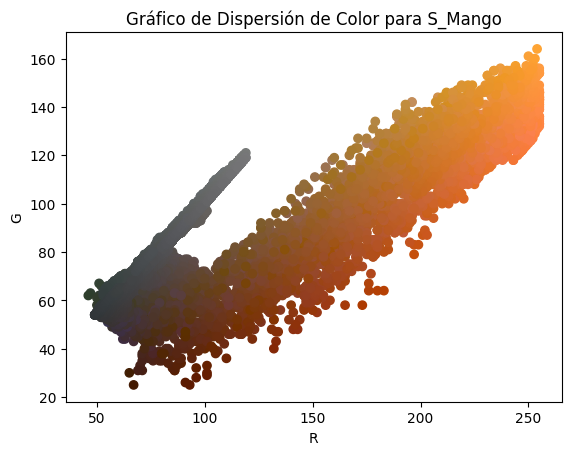

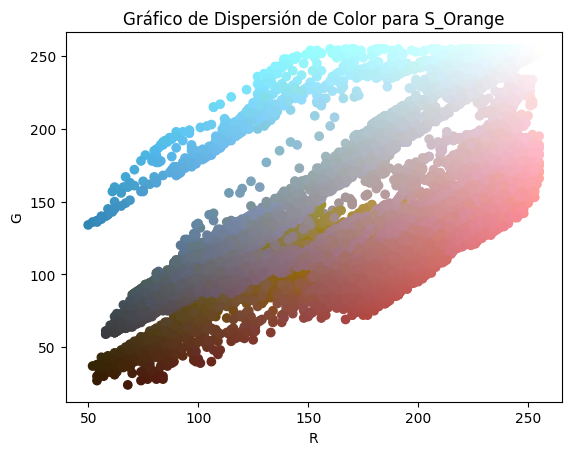

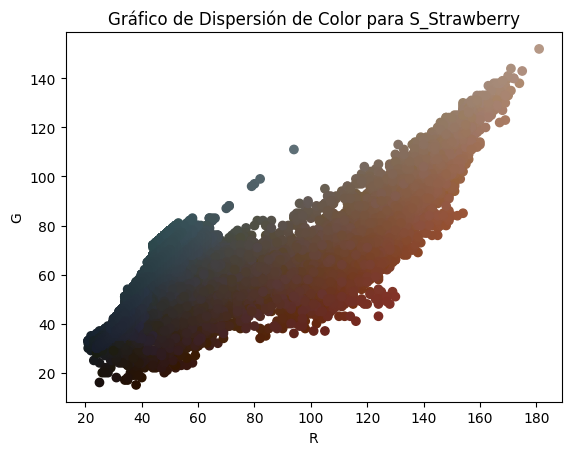

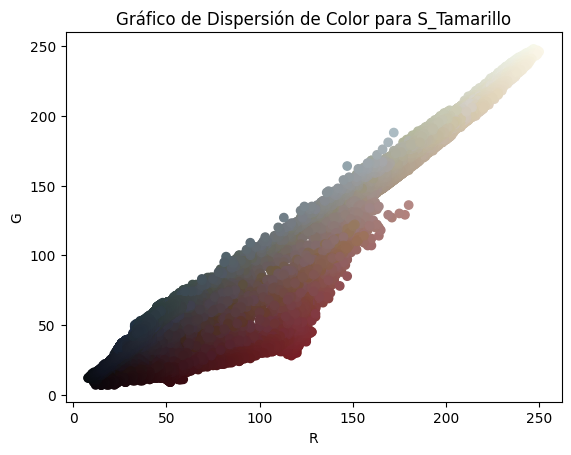

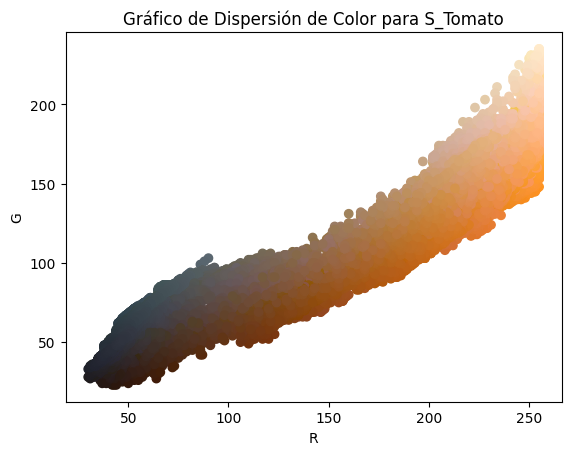

In [21]:
import matplotlib.pyplot as plt

for nombre_fruta, imagenes in imagenes_frutas.items():
    if imagenes:
        # Mostrar un gráfico de dispersión para los valores de píxeles RGB
        pixels = imagenes[0].reshape(-1, 3) # Redimensionar la imagen a una matriz de píxeles RGB
        plt.scatter(pixels[:, 0], pixels[:, 1], c=pixels / 255.0)
        plt.title(f'Gráfico de Dispersión de Color para {nombre_fruta}')
        plt.xlabel('R')
        plt.ylabel('G')
        plt.show()
